In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf 
pysql = lambda q: sqldf(q, globals())

In [2]:
player_activity = pd.read_excel('Player_Activity_Data.xlsx')
player_activity.head()

,src_player_id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
0,16585649,2020-08-31,SportsBook,Livebook,1,500.00,0.00,500.0000,420.000000
1,12845036,2019-05-31,SportsBook,Prematch,28,1229.48,1177.85,41.6300,34.969200
2,12720869,2021-06-30,eGaming,Non Table Games,1,73.40,46.20,27.2000,22.848000
3,18979743,2021-02-28,eGaming,Non Table Games,1,52.00,21.70,30.3000,25.452000
4,12580168,2020-12-31,eGaming,Non Table Games,1,74.00,54.60,18.6674,15.680616


In [3]:
player_details = pd.read_excel('Player_Details.xlsx')
player_details.head()

,Src_Player_Id,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN
0,12584958,2019-02-23 17:24:49,NaN,999999.0,M,1991-08-05,N
1,12356925,2019-01-07 15:57:11,NaN,999999.0,M,1993-09-09,N
2,12500831,2019-02-10 08:31:13,NaN,999999.0,M,1971-10-15,N
3,12660009,2019-03-12 09:42:53,NaN,999999.0,M,2000-12-15,N
4,12447120,2019-01-28 09:53:42,NaN,999999.0,M,1994-03-07,N


In [4]:
first_deposit = pd.read_excel('First_Deposit_Data.xlsx')
first_deposit.head()

,Src_Player_Id,First_Deposit_Date,First_Deposit_Channel,First_Deposit_Method,First_Deposit_Amount
0,13472812,NaT,NaN,NaN,NaN
1,13331793,NaT,NaN,NaN,NaN
2,13116242,NaT,NaN,NaN,NaN
3,12689016,NaT,NaN,NaN,NaN
4,12681525,NaT,NaN,NaN,NaN


In [5]:
first_bet = pd.read_excel('First_Bet_Data.xlsx')
first_bet.head()

,Src_Player_Id,System_First_Bet_Datetime,System_First_BetSlip_Amt,System_First_Bet_Product_Group,System_First_Bet_Product,System_First_Bet_Channel,System_First_Bet_Platform
0,15643431,2020-10-09 03:57:29.000,2.5,eGaming,Non Table Games,Online,Mobile
1,13593034,2019-09-27 15:03:58.244,10.0,Sports,Prematch,Online,Mobile
2,15894194,2021-02-28 02:22:07.000,2.0,eGaming,Non Table Games,Online,Web
3,13238000,2019-07-08 10:39:45.000,0.4,eGaming,Non Table Games,Online,Mobile
4,12866848,2019-04-27 14:20:27.000,0.4,eGaming,Non Table Games,Online,Mobile


In [6]:
bonus_cost = pd.read_excel('BonusCost_Data.xlsx')
bonus_cost.head()

,Src_PLAYER_ID,ActivityMonth,Product,BONUS_COST
0,16051927,2020-06-30,eGaming,50.0
1,19309540,2021-02-28,eGaming,40.0
2,13176431,2020-01-31,eGaming,15.0
3,12405628,2019-02-28,SportsBook,30.0
4,17486248,2021-02-28,eGaming,25.0


### Data Cleaning

#### Making all the headers lowercase

In [7]:
player_activity.columns = player_activity.columns.str.lower()
player_details.columns = player_details.columns.str.lower()
first_deposit.columns = first_deposit.columns.str.lower()
first_bet.columns = first_bet.columns.str.lower()
bonus_cost.columns = bonus_cost.columns.str.lower()

In [8]:
player_activity.head()

,src_player_id,activitymonth,product,subproduct,activeplayerdays,bet_amount,win_amount,gross_win,net_gross_win
0,16585649,2020-08-31,SportsBook,Livebook,1,500.00,0.00,500.0000,420.000000
1,12845036,2019-05-31,SportsBook,Prematch,28,1229.48,1177.85,41.6300,34.969200
2,12720869,2021-06-30,eGaming,Non Table Games,1,73.40,46.20,27.2000,22.848000
3,18979743,2021-02-28,eGaming,Non Table Games,1,52.00,21.70,30.3000,25.452000
4,12580168,2020-12-31,eGaming,Non Table Games,1,74.00,54.60,18.6674,15.680616


In [9]:
player_details.head()

,src_player_id,signup_date,acquisition_channel,src_advertiser_id,gender,date_of_birth,internal_player_yn
0,12584958,2019-02-23 17:24:49,NaN,999999.0,M,1991-08-05,N
1,12356925,2019-01-07 15:57:11,NaN,999999.0,M,1993-09-09,N
2,12500831,2019-02-10 08:31:13,NaN,999999.0,M,1971-10-15,N
3,12660009,2019-03-12 09:42:53,NaN,999999.0,M,2000-12-15,N
4,12447120,2019-01-28 09:53:42,NaN,999999.0,M,1994-03-07,N


In [10]:
first_deposit.head()

,src_player_id,first_deposit_date,first_deposit_channel,first_deposit_method,first_deposit_amount
0,13472812,NaT,NaN,NaN,NaN
1,13331793,NaT,NaN,NaN,NaN
2,13116242,NaT,NaN,NaN,NaN
3,12689016,NaT,NaN,NaN,NaN
4,12681525,NaT,NaN,NaN,NaN


In [11]:
first_bet.head()

,src_player_id,system_first_bet_datetime,system_first_betslip_amt,system_first_bet_product_group,system_first_bet_product,system_first_bet_channel,system_first_bet_platform
0,15643431,2020-10-09 03:57:29.000,2.5,eGaming,Non Table Games,Online,Mobile
1,13593034,2019-09-27 15:03:58.244,10.0,Sports,Prematch,Online,Mobile
2,15894194,2021-02-28 02:22:07.000,2.0,eGaming,Non Table Games,Online,Web
3,13238000,2019-07-08 10:39:45.000,0.4,eGaming,Non Table Games,Online,Mobile
4,12866848,2019-04-27 14:20:27.000,0.4,eGaming,Non Table Games,Online,Mobile


In [12]:
bonus_cost.head()

,src_player_id,activitymonth,product,bonus_cost
0,16051927,2020-06-30,eGaming,50.0
1,19309540,2021-02-28,eGaming,40.0
2,13176431,2020-01-31,eGaming,15.0
3,12405628,2019-02-28,SportsBook,30.0
4,17486248,2021-02-28,eGaming,25.0


#### Total First Deposits

In [13]:
first_deposit.first_deposit_date.describe()

C:\Users\abraa\AppData\Local\Temp\ipykernel_5884\1367858127.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  first_deposit.first_deposit_date.describe()


count                  127261
unique                 127097
top       2020-11-11 18:27:44
freq                        2
first     2019-01-01 09:55:27
last      2021-07-12 21:46:38
Name: first_deposit_date, dtype: object

In [14]:
print(len(first_deposit))
total_first_deposit = first_deposit.query('first_deposit_date.notna()')
print(len(total_first_deposit))

292785
127261


In [15]:
print("Total number of player ids: ", len(first_deposit))
print("Total number of player ids who actually deposited money: ", len(total_first_deposit))
print("Total % deposited: ", (len(total_first_deposit)/len(first_deposit)*100),"%")
print("Data from 2019-01-01 till 2021-07-12")

Total number of player ids:  292785
Total number of player ids who actually deposited money:  127261
Total % deposited:  43.465683009717026 %
Data from 2019-01-01 till 2021-07-12


#### Stats on first deposit amount

In [16]:
total_first_deposit.first_deposit_amount.describe()

count    127261.000000
mean        122.604902
std         211.805569
min          10.000000
25%          30.000000
50%          50.000000
75%         100.000000
max       13000.000000
Name: first_deposit_amount, dtype: float64

#### Breakdown of deposit channels and methods

In [17]:
breakdown_first_deposit_channel = total_first_deposit.groupby(['first_deposit_channel','first_deposit_method']).size()
print(breakdown_first_deposit_channel)

first_deposit_channel  first_deposit_method
Online                 Correction                  3
                       MAESTRO                  2664
                       MC                      27880
                       MoneyBookersViaSC         599
                       NetellerviaSC              71
                       PaysafecardViaSC        13589
                       VISA                    53677
Retail                 RetailDeposit           28778
dtype: int64


#### Joining first deposit and first bet (NOT COMPLETE)

In [18]:
total_first_bet = first_bet.query('system_first_bet_datetime.notna()')
joined_bet_deposit = pd.merge(total_first_bet, total_first_deposit, how='inner', on='src_player_id')
print(len(joined_bet_deposit))

125663


In [19]:
joined_bet_deposit.head()

,src_player_id,system_first_bet_datetime,system_first_betslip_amt,system_first_bet_product_group,system_first_bet_product,system_first_bet_channel,system_first_bet_platform,first_deposit_date,first_deposit_channel,first_deposit_method,first_deposit_amount
0,15643431,2020-10-09 03:57:29.000,2.5,eGaming,Non Table Games,Online,Mobile,2020-10-09 03:23:58,Online,MC,200.0
1,13593034,2019-09-27 15:03:58.244,10.0,Sports,Prematch,Online,Mobile,2019-09-27 09:13:18,Retail,RetailDeposit,30.0
2,15894194,2021-02-28 02:22:07.000,2.0,eGaming,Non Table Games,Online,Web,2021-02-28 02:18:26,Online,VISA,25.0
3,13238000,2019-07-08 10:39:45.000,0.4,eGaming,Non Table Games,Online,Mobile,2019-07-08 10:20:06,Online,VISA,25.0
4,12866848,2019-04-27 14:20:27.000,0.4,eGaming,Non Table Games,Online,Mobile,2019-04-27 11:59:51,Retail,RetailDeposit,70.0


In [20]:
joined_bet_deposit['date_difference'] = (joined_bet_deposit['first_deposit_date'] - joined_bet_deposit['system_first_bet_datetime']).dt.days

In [21]:
joined_bet_deposit.head()

,src_player_id,system_first_bet_datetime,system_first_betslip_amt,system_first_bet_product_group,system_first_bet_product,system_first_bet_channel,system_first_bet_platform,first_deposit_date,first_deposit_channel,first_deposit_method,first_deposit_amount,date_difference
0,15643431,2020-10-09 03:57:29.000,2.5,eGaming,Non Table Games,Online,Mobile,2020-10-09 03:23:58,Online,MC,200.0,-1
1,13593034,2019-09-27 15:03:58.244,10.0,Sports,Prematch,Online,Mobile,2019-09-27 09:13:18,Retail,RetailDeposit,30.0,-1
2,15894194,2021-02-28 02:22:07.000,2.0,eGaming,Non Table Games,Online,Web,2021-02-28 02:18:26,Online,VISA,25.0,-1
3,13238000,2019-07-08 10:39:45.000,0.4,eGaming,Non Table Games,Online,Mobile,2019-07-08 10:20:06,Online,VISA,25.0,-1
4,12866848,2019-04-27 14:20:27.000,0.4,eGaming,Non Table Games,Online,Mobile,2019-04-27 11:59:51,Retail,RetailDeposit,70.0,-1


#### Total Bets

In [22]:
print("Potential people who can bet:",len(first_bet))
print("People who actually placed a bet:", len(total_first_bet))
print("Total % of people who bet:", (len(total_first_bet)/len(first_bet)*100),"%")

Potential people who can bet: 292785
People who actually placed a bet: 159166
Total % of people who bet: 54.36275765493451 %


#### First bet per platform

system_first_bet_platform
Mobile    127948
Web        31218
dtype: int64


Text(0, 0.5, 'Bet Count')

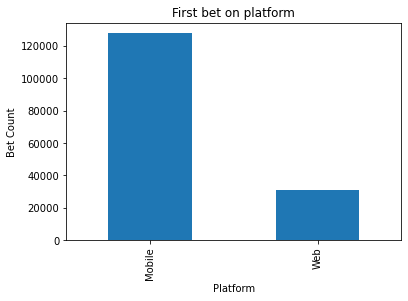

In [34]:
breakdown_first_bet_platform = total_first_bet.groupby('system_first_bet_platform').size()
print(breakdown_first_bet_platform)
breakdown_first_bet_platform.plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("First bet on platform")
plt.xlabel("Platform")
plt.ylabel("Bet Count")

#### First bet product

system_first_bet_product_group  system_first_bet_product
IVG                             IVG                           367
Lottery                         Lucky Six                    1017
                                LuckyX                         72
                                Next Six                       24
Lotto                           Lotto                        1742
Sports                          Live                        16453
                                Prematch                    44898
eGaming                         Non Table Games             91147
                                Table Games                  3446
dtype: int64


Text(0, 0.5, 'Product')

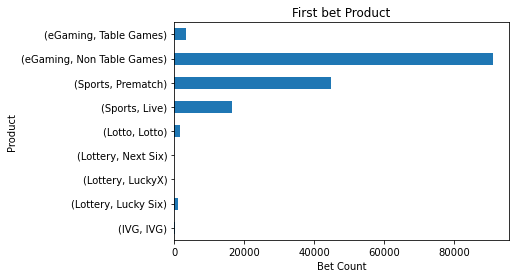

In [35]:
breakdown_first_bet_product = total_first_bet.groupby(['system_first_bet_product_group','system_first_bet_product']).size()
print(breakdown_first_bet_product)
breakdown_first_bet_product.plot(kind='barh')
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("First bet Product")
plt.xlabel("Bet Count")
plt.ylabel("Product")

#### Products and their total accepted bonuses

In [36]:
breakdown_product_bonus = pysql('SELECT product, SUM(bonus_cost) AS Total FROM bonus_cost WHERE activitymonth IS NOT NULL OR activitymonth != "NULL" GROUP BY product')
print(breakdown_product_bonus)


      product        Total
0  SportsBook   8084753.09
1     eGaming  15390785.36


##### eGaming has approx 2x the accepted bonuses compared to Sports

#### Number of players with only 1 bet 

In [39]:
breakdown_one_bet = pysql('SELECT DISTINCT(src_player_id), COUNT(src_player_id) as Counts FROM player_activity GROUP BY src_player_id HAVING COUNT(src_player_id) = 1')
print(breakdown_one_bet)

       src_player_id  Counts
0           12329393       1
1           12329407       1
2           12329630       1
3           12329932       1
4           12329942       1
...              ...     ...
68372       20701485       1
68373       20701499       1
68374       20701533       1
68375       20703294       1
68376       20703585       1

[68377 rows x 2 columns]


In [27]:
print(len(breakdown_one_bet))

68377


#### Number of players with only 2 bets 

In [38]:
breakdown_two_bet = pysql('SELECT DISTINCT(src_player_id), COUNT(src_player_id) as Counts FROM player_activity GROUP BY src_player_id HAVING COUNT(src_player_id) = 2')
print(breakdown_two_bet)

       src_player_id  Counts
0           12330083       2
1           12330287       2
2           12330391       2
3           12330397       2
4           12330467       2
...              ...     ...
31247       20699457       2
31248       20699839       2
31249       20701385       2
31250       20701685       2
31251       20702367       2

[31252 rows x 2 columns]


In [29]:
print(len(breakdown_two_bet))

31252


#### Number of players with more than 2 bets

In [37]:
breakdown_more_bet = pysql('SELECT DISTINCT(src_player_id), COUNT(src_player_id) as Counts FROM player_activity GROUP BY src_player_id HAVING COUNT(src_player_id) > 2')
print(breakdown_more_bet)

       src_player_id  Counts
0           12329956      14
1           12329998       5
2           12330018      21
3           12330040       3
4           12330059      39
...              ...     ...
67693       20695832       3
67694       20696965       3
67695       20699726       4
67696       20700624       4
67697       20702081       3

[67698 rows x 2 columns]


In [31]:
print(len(breakdown_more_bet))

67698


In [32]:
breakdown_more_bet.Counts.describe()

count    67698.000000
mean        10.773568
std         11.806712
min          3.000000
25%          4.000000
50%          6.000000
75%         13.000000
max        113.000000
Name: Counts, dtype: float64